In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv(".env_sql")  # carga tu contraseña u otros secretos

USER = "root"
PASSWORD = os.getenv("Key")
HOST = "localhost"
PORT = "3306"
DB_NAME = "todos_a_bordo"

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}")

In [2]:
# 3. Definir función para cargar tablas
def load_table(table_name):
    return pd.read_sql(f"SELECT * FROM {table_name}", engine)

turistas_internacionales = load_table("turistas_internacionales_julio")
turistas_nacionales = load_table("turistas_nacional_julio")
clickandboat = load_table("clickandboat_barcos")
aemet = load_table("aemet_clima")

In [3]:
# Convertir la columna 'fecha' a datetime
aemet['fecha'] = pd.to_datetime(aemet['fecha'], dayfirst=True)  # dayfirst=True si tu formato es DD/MM/YYYY

# Ahora sí puedes filtrar por año y provincia
temp_ibiza_2025 = aemet[
    (aemet['provincia'].str.upper() == 'IBIZA') &
    (aemet['fecha'].dt.year == 2025)
]

print(temp_ibiza_2025.head())


Empty DataFrame
Columns: [fecha, provincia, temperatura_med, temperatura_max, direccion_viento, velocidad_med_viento, racha_viento, año, ZONA_PROYECTO]
Index: []


C:\Users\pccom\AppData\Local\Temp\ipykernel_32132\1097113370.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  aemet['fecha'] = pd.to_datetime(aemet['fecha'], dayfirst=True)  # dayfirst=True si tu formato es DD/MM/YYYY


Filas turistas Ibiza: 1
Filas temperatura Ibiza: 17


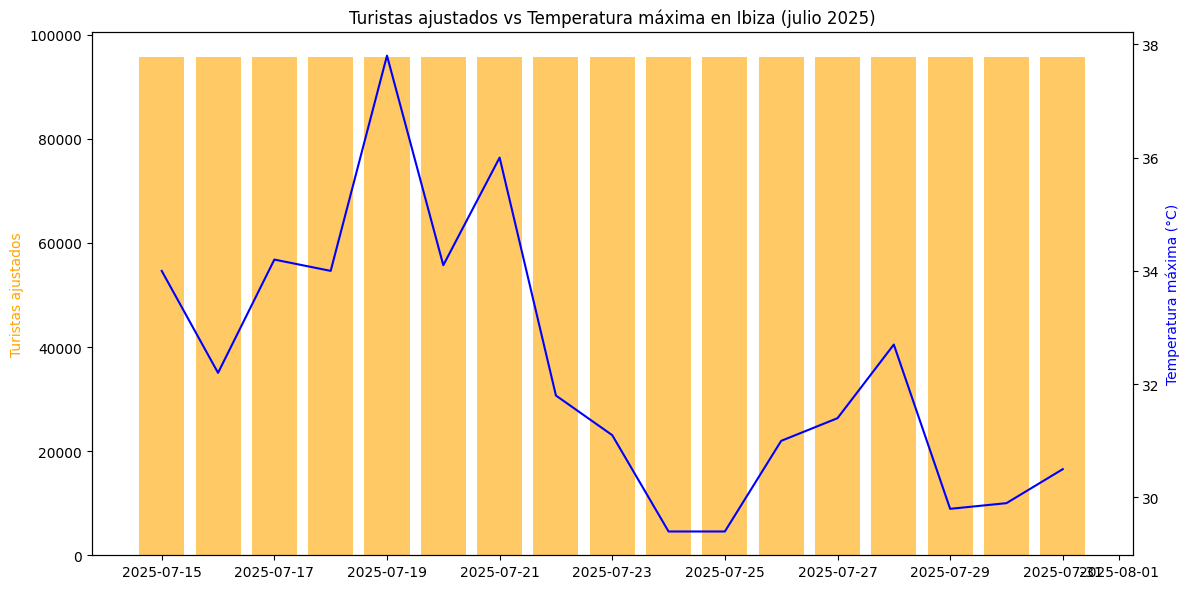

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# 1. FILTRAR TURISTAS IBIZA JULIO 2025
# --------------------------
turistas_ibiza_2025 = turistas_nacionales[
    (turistas_nacionales['ZONA_PROYECTO'].str.upper() == 'IBIZA') &
    (turistas_nacionales['AÑO'] == 2025) &
    (turistas_nacionales['MES'] == 7)
]

print("Filas turistas Ibiza:", len(turistas_ibiza_2025))


# --------------------------
# 2. FILTRAR TEMPERATURAS DE EIVISSA JULIO 2025
# (OJO: el año está en columna 'año', no 'AÑO')
# --------------------------
aemet['fecha'] = pd.to_datetime(aemet['fecha'])

temp_ibiza_2025 = aemet[
    (aemet['provincia'].str.upper() == 'EIVISSA') &
    (aemet['fecha'].dt.year == 2025) &
    (aemet['fecha'].dt.month == 7)
]

print("Filas temperatura Ibiza:", len(temp_ibiza_2025))


# --------------------------
# 3. CREAR SERIE DIARIA DE TURISTAS
# Usamos el valor total de turistas para cada día del mes
# --------------------------
turistas_diarios = pd.DataFrame({
    "fecha": temp_ibiza_2025["fecha"],
    "turistas_ajustados": turistas_ibiza_2025["TURISTAS_AJUSTADOS"].sum()
})


# --------------------------
# 4. GRAFICAR
# --------------------------
fig, ax1 = plt.subplots(figsize=(12,6))

# Barras (turistas)
ax1.bar(
    turistas_diarios['fecha'],
    turistas_diarios['turistas_ajustados'],
    color='orange', alpha=0.6,
    label='Turistas ajustados'
)
ax1.set_ylabel('Turistas ajustados', color='orange')

# Línea (temperatura)
ax2 = ax1.twinx()
ax2.plot(
    temp_ibiza_2025['fecha'],
    temp_ibiza_2025['temperatura_max'],
    color='blue', label='Temperatura máxima'
)
ax2.set_ylabel('Temperatura máxima (°C)', color='blue')

plt.title("Turistas ajustados vs Temperatura máxima en Ibiza (julio 2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
import numpy as np
import pandas as pd

# Filtrar barcos en Ibiza (ZONA_PROYECTO) julio 2025
barcos_ibiza = clickandboat.copy()  # asegúrate de tener clickandboat cargado
barcos_ibiza = barcos_ibiza[
    (barcos_ibiza['ZONA_PROYECTO'].str.upper() == 'IBIZA')
].copy()

# Crear columna de fechas para los días 25, 26, 27 de julio
fechas = pd.to_datetime(['2025-07-25','2025-07-26','2025-07-27'])
barcos_ibiza['fecha'] = np.tile(fechas, int(np.ceil(len(barcos_ibiza)/len(fechas))))[:len(barcos_ibiza)]

# Filtrar temperaturas de Ibiza (Eivissa) julio 2025
aemet_ibiza = aemet[
    (aemet['provincia'].str.upper() == 'EIVISSA') &
    (aemet['fecha'].dt.year == 2025) &
    (aemet['fecha'].dt.month == 7) &
    (aemet['fecha'].dt.day.isin([25,26,27]))
].copy()

# Merge por fecha
df_ibiza = pd.merge(
    barcos_ibiza,
    aemet_ibiza[['fecha','temperatura_max']],
    on='fecha',
    how='left'
)


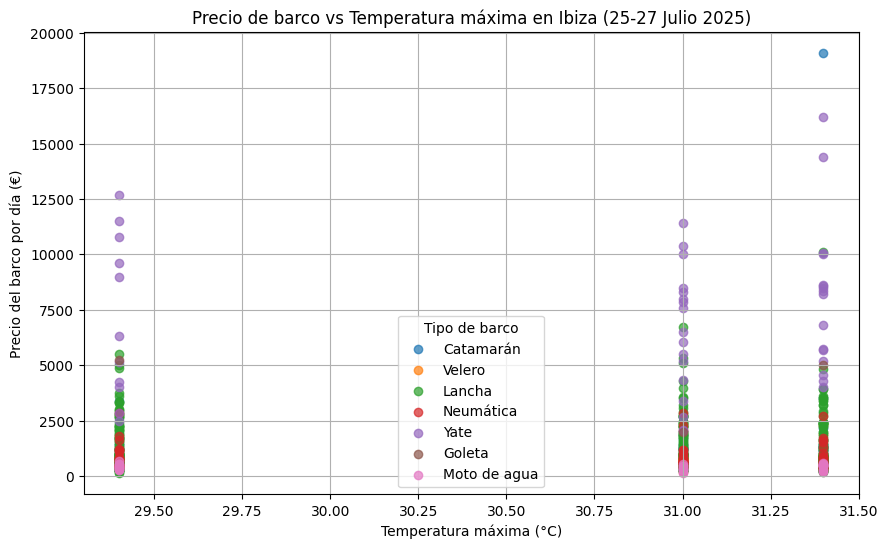

In [ ]:
# Precio barco temperatura Ibiza fin de semana 25-27 julio 2025

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for tipo in df_ibiza['tipo_barco'].unique():
    subset = df_ibiza[df_ibiza['tipo_barco'] == tipo]
    plt.scatter(subset['temperatura_max'], subset['precio_dia'], label=tipo, alpha=0.7)

plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Precio del barco por día (€)')
plt.title('Precio de barco vs Temperatura máxima en Ibiza (25-27 Julio 2025)')
plt.legend(title='Tipo de barco')
plt.grid(True)
plt.show()


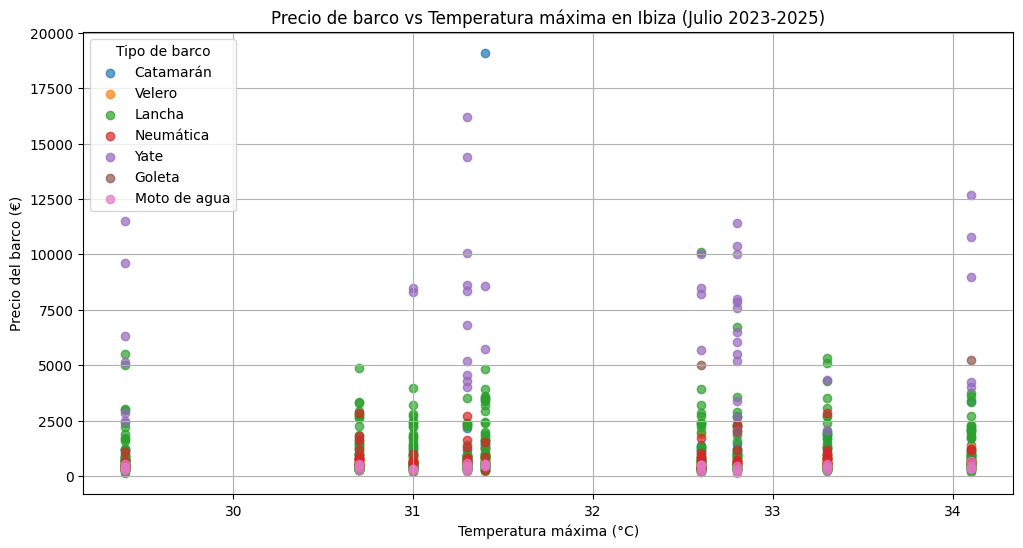

In [ ]:
# Precio barco y temperatura maxima Ibiza año 2023-2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar barcos en Ibiza
barcos_ibiza = clickandboat[
    clickandboat['ZONA_PROYECTO'].str.upper() == 'IBIZA'
].copy()

# Supongamos que los datos no tienen fecha: asignamos manualmente para cada año
# Si los datos tienen varias filas por día, este paso puede adaptarse
fechas_base = pd.to_datetime(['2023-07-25', '2023-07-26', '2023-07-27',
                              '2024-07-25', '2024-07-26', '2024-07-27',
                              '2025-07-25', '2025-07-26', '2025-07-27'])

# Repetimos las fechas según el número de filas
barcos_ibiza['fecha'] = np.tile(fechas_base, int(np.ceil(len(barcos_ibiza)/len(fechas_base))))[:len(barcos_ibiza)]

# Filtrar temperaturas de Ibiza (Eivissa) para julio 2023, 2024 y 2025
aemet_ibiza = aemet[
    (aemet['provincia'].str.upper() == 'EIVISSA') &
    (aemet['fecha'].dt.month == 7) &
    (aemet['fecha'].dt.year.isin([2023, 2024, 2025]))
].copy()

# Merge de barcos con temperatura por fecha
df_ibiza = pd.merge(
    barcos_ibiza,
    aemet_ibiza[['fecha', 'temperatura_max']],
    on='fecha',
    how='left'
)

# Gráfico: precio del barco vs temperatura máxima por tipo de barco y año
plt.figure(figsize=(12,6))
for tipo in df_ibiza['tipo_barco'].unique():
    subset = df_ibiza[df_ibiza['tipo_barco'] == tipo]
    plt.scatter(subset['temperatura_max'], subset['precio_dia'], label=tipo, alpha=0.7)

plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Precio del barco (€)')
plt.title('Precio de barco vs Temperatura máxima en Ibiza (Julio 2023-2025)')
plt.legend(title='Tipo de barco')
plt.grid(True)
plt.show()


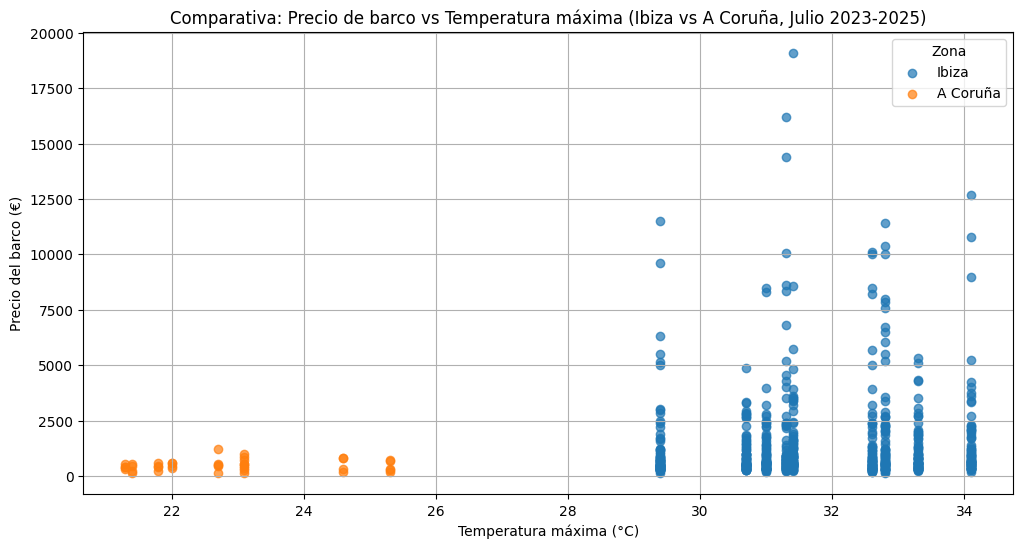

In [ ]:
# Comparativa entre Ibiza y A Coruña precio barco

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar barcos y temperaturas de Ibiza
barcos_ibiza = clickandboat[clickandboat['ZONA_PROYECTO'].str.upper() == 'IBIZA'].copy()
# Suponiendo que son los días 25, 26, 27 de julio 2023-2025
fechas_ibiza = pd.to_datetime(['2023-07-25','2023-07-26','2023-07-27',
                               '2024-07-25','2024-07-26','2024-07-27',
                               '2025-07-25','2025-07-26','2025-07-27'])
# Repetir las fechas según el número de barcos
barcos_ibiza['fecha'] = np.tile(fechas_ibiza, int(np.ceil(len(barcos_ibiza)/len(fechas_ibiza))))[:len(barcos_ibiza)]

# Filtrar temperaturas de Ibiza
aemet_ibiza = aemet[(aemet['provincia'].str.upper() == 'EIVISSA') &
                    (aemet['fecha'].dt.month == 7) &
                    (aemet['fecha'].dt.year.isin([2023,2024,2025]))].copy()

# Merge Ibiza
df_ibiza = pd.merge(barcos_ibiza, aemet_ibiza[['fecha','temperatura_max']], on='fecha', how='left')
df_ibiza['zona'] = 'Ibiza'

# Hacer lo mismo para A Coruña
barcos_coruna = clickandboat[clickandboat['ZONA_PROYECTO'].str.upper() == 'A CORUÑA'].copy()
fechas_coruna = pd.to_datetime(['2023-07-25','2023-07-26','2023-07-27',
                                '2024-07-25','2024-07-26','2024-07-27',
                                '2025-07-25','2025-07-26','2025-07-27'])
barcos_coruna['fecha'] = np.tile(fechas_coruna, int(np.ceil(len(barcos_coruna)/len(fechas_coruna))))[:len(barcos_coruna)]

aemet_coruna = aemet[(aemet['provincia'].str.upper() == 'A CORUÑA') &
                     (aemet['fecha'].dt.month == 7) &
                     (aemet['fecha'].dt.year.isin([2023,2024,2025]))].copy()

df_coruna = pd.merge(barcos_coruna, aemet_coruna[['fecha','temperatura_max']], on='fecha', how='left')
df_coruna['zona'] = 'A Coruña'

# Unir ambos
df_comparativo = pd.concat([df_ibiza, df_coruna])

# Gráfico comparativo
plt.figure(figsize=(12,6))
for zona in df_comparativo['zona'].unique():
    subset = df_comparativo[df_comparativo['zona'] == zona]
    plt.scatter(subset['temperatura_max'], subset['precio_dia'], label=zona, alpha=0.7)

plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Precio del barco (€)')
plt.title('Comparativa: Precio de barco vs Temperatura máxima (Ibiza vs A Coruña, Julio 2023-2025)')
plt.legend(title='Zona')
plt.grid(True)
plt.show()


ZONA_PROYECTO  A Coruña  Ibiza  Málaga
tipo_barco                            
Catamarán             1     42      12
Goleta                0      3       0
Lancha               17    389     139
Moto de agua          2     38       5
Neumática             3     83       4
Velero               16     52      15
Yate                  0     44      17


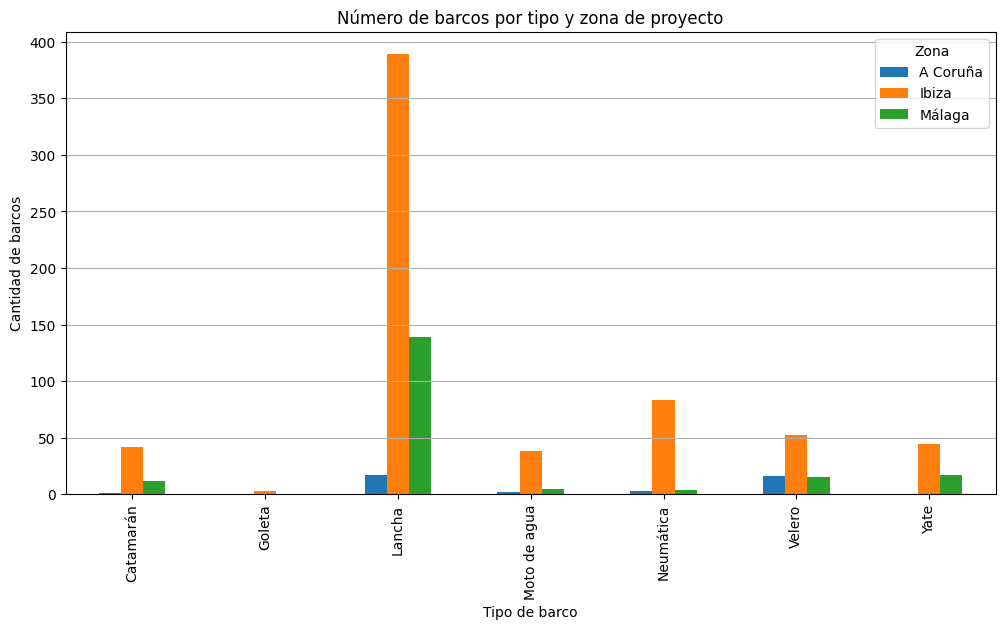

In [ ]:
# Numero barcos por zona de proyecto

import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Tabla pivote ---
tabla_pivote = (
    clickandboat.pivot_table(
        index='tipo_barco',
        columns='ZONA_PROYECTO',
        values='precio_dia',   # cualquier columna sirve, usamos count
        aggfunc='count',
        fill_value=0
    )
)

print(tabla_pivote)

# --- 2) Gráfico ---
tabla_pivote.plot(kind='bar', figsize=(12,6))

plt.title("Número de barcos por tipo y zona de proyecto")
plt.xlabel("Tipo de barco")
plt.ylabel("Cantidad de barcos")
plt.legend(title="Zona")
plt.grid(axis='y')

plt.show()



Resumen por año (turistas vs temp media máxima en julio):
    AÑO  TURISTAS_AJUSTADOS  temperatura_max_media
0  2023              142565              33.964706
1  2024              125131              32.564706
2  2025               95742              32.311765

Correlación Pearson r = 0.864, p-value = 0.3358
Regresión lineal: slope = 22967.305, intercept = -635559.1, R² ≈ 0.747, p-slope = 0.3358


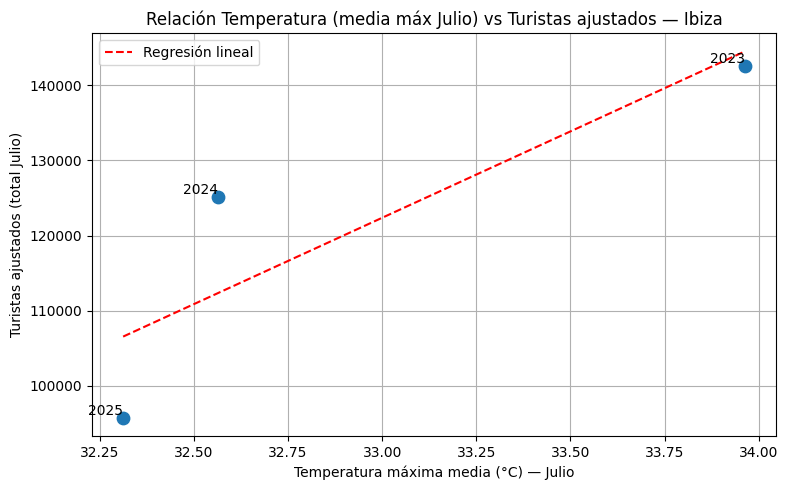


Muestra diaria (primeras filas):
       fecha  temperatura_max  turistas_diarios_est
0 2025-07-15             34.0           5631.882353
1 2025-07-16             32.2           5631.882353
2 2025-07-17             34.2           5631.882353
3 2025-07-18             34.0           5631.882353
4 2025-07-19             37.8           5631.882353

Diario (2025 julio) Pearson r = nan, p = nan, slope=0.000, R²≈nan


C:\Users\pccom\AppData\Local\Temp\ipykernel_23444\4255675686.py:115: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_d, p_d = pearsonr(df_daily['temperatura_max'], df_daily['turistas_diarios_est'])


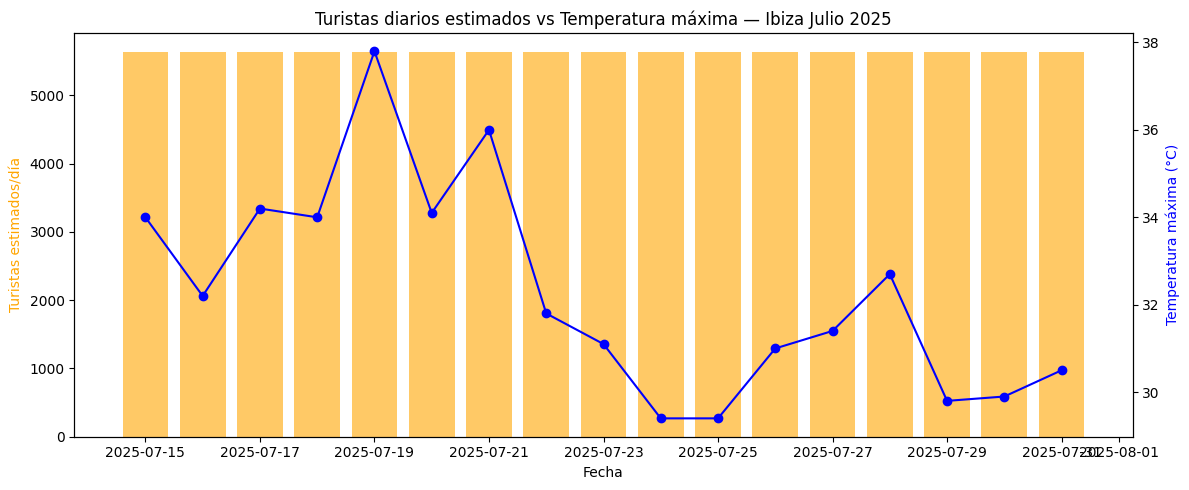

In [14]:
# ==========================
# Análisis impacto clima -> turistas
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

# --- Asegúrate de que tus DataFrames están cargados:
# turistas_nacionales  (tabla completa)
# aemet                (tabla completa)
# Ambos ya los cargaste desde SQL previamente.

# A) PREPARACIÓN: agregación mensual por año (enfocándonos en Julio)
# Filtrar Ibiza en turistas (ZONA_PROYECTO) y julio
turistas_ibiza_julio = turistas_nacionales[
    (turistas_nacionales['ZONA_PROYECTO'].str.upper() == 'IBIZA') &
    (turistas_nacionales['MES'] == 7)
].copy()

# Agrupar por año y sumar turistas ajustados en julio (por si hubiese varias filas)
turistas_agg = (turistas_ibiza_julio
                .groupby('AÑO', as_index=False)
                .agg({'TURISTAS_AJUSTADOS': 'sum'}))

# Preparar AEMET: asegurarnos de datetime
aemet['fecha'] = pd.to_datetime(aemet['fecha'], errors='coerce')

# Filtrar Eivissa y julio 2023-2025
aemet_ibiza_julio = aemet[
    (aemet['provincia'].str.upper() == 'EIVISSA') &
    (aemet['fecha'].dt.month == 7) &
    (aemet['fecha'].dt.year.isin(turistas_agg['AÑO'].unique()))
].copy()

# Calcular temperatura media máxima por año (julio)
temp_agg = (aemet_ibiza_julio
            .groupby(aemet_ibiza_julio['fecha'].dt.year)
            .agg(temperatura_max_media=('temperatura_max', 'mean'))
            .reset_index()
            .rename(columns={'fecha': 'AÑO', 'index': 'AÑO'}))

# Ajustar nombres para merge: 'AÑO' en turistas_agg y 'fecha'.dt.year en temp_agg
temp_agg = temp_agg.rename(columns={'fecha': 'AÑO'})  # por si existe
# En caso no tener columna AÑO explícita, crearla:
temp_agg['AÑO'] = aemet_ibiza_julio['fecha'].dt.year.unique()
# mejor rehacer correctamente:
temp_agg = (aemet_ibiza_julio
            .assign(AÑO=aemet_ibiza_julio['fecha'].dt.year)
            .groupby('AÑO', as_index=False)
            .agg(temperatura_max_media=('temperatura_max', 'mean')))

# Merge mensual/por-año (Enfoque A)
df_yearly = pd.merge(turistas_agg, temp_agg, on='AÑO', how='inner')
print("\nResumen por año (turistas vs temp media máxima en julio):")
print(df_yearly)

# Correlación y regresión (Enfoque A)
if len(df_yearly) >= 2:
    r, p = pearsonr(df_yearly['temperatura_max_media'], df_yearly['TURISTAS_AJUSTADOS'])
    lr = linregress(df_yearly['temperatura_max_media'], df_yearly['TURISTAS_AJUSTADOS'])
    print(f"\nCorrelación Pearson r = {r:.3f}, p-value = {p:.4f}")
    print(f"Regresión lineal: slope = {lr.slope:.3f}, intercept = {lr.intercept:.1f}, R² ≈ {lr.rvalue**2:.3f}, p-slope = {lr.pvalue:.4f}")
else:
    print("\nNo hay suficientes años para pruebas estadísticas robustas (se necesitan >=2 filas).")

# Gráfico (Enfoque A) Scatter + línea de regresión
plt.figure(figsize=(8,5))
plt.scatter(df_yearly['temperatura_max_media'], df_yearly['TURISTAS_AJUSTADOS'], s=80)
if len(df_yearly) >= 2:
    xs = np.linspace(df_yearly['temperatura_max_media'].min(), df_yearly['temperatura_max_media'].max(), 100)
    ys = lr.intercept + lr.slope * xs
    plt.plot(xs, ys, color='red', linestyle='--', label='Regresión lineal')
for i,row in df_yearly.iterrows():
    plt.text(row['temperatura_max_media'], row['TURISTAS_AJUSTADOS'], str(int(row['AÑO'])), va='bottom', ha='right')
plt.xlabel('Temperatura máxima media (°C) — Julio')
plt.ylabel('Turistas ajustados (total Julio)')
plt.title('Relación Temperatura (media máx Julio) vs Turistas ajustados — Ibiza')
plt.grid(True)
plt.legend() if len(df_yearly) >= 2 else None
plt.tight_layout()
plt.show()


# B) ENFOQUE DIARIO (solo julio 2025) — complementar, menos robusto
# Filtrar julio 2025 en aemet para Eivissa
temp_ibiza_2025 = aemet[
    (aemet['provincia'].str.upper() == 'EIVISSA') &
    (aemet['fecha'].dt.year == 2025) &
    (aemet['fecha'].dt.month == 7)
].copy().sort_values('fecha')

# Seleccionar turistas ajustados julio 2025 (total) y distribuir por día
turistas_ibiza_2025 = turistas_nacionales[
    (turistas_nacionales['ZONA_PROYECTO'].str.upper() == 'IBIZA') &
    (turistas_nacionales['AÑO'] == 2025) &
    (turistas_nacionales['MES'] == 7)
]

if len(turistas_ibiza_2025) == 0:
    print("\nNo se encontró registro de turistas ajustados para Ibiza julio 2025 — no se puede hacer análisis diario.")
else:
    total_tur = turistas_ibiza_2025['TURISTAS_AJUSTADOS'].sum()
    # Distribución uniforme por día (opción simple). Otra opción: proporcional a racha de reservas si tuvieras daily bookings.
    n_days = len(temp_ibiza_2025)
    turistas_diarios = temp_ibiza_2025[['fecha']].copy()
    turistas_diarios['turistas_diarios_est'] = total_tur / n_days

    # Merge y correlación diaria
    df_daily = pd.merge(temp_ibiza_2025[['fecha','temperatura_max']], turistas_diarios, on='fecha', how='inner')
    print("\nMuestra diaria (primeras filas):")
    print(df_daily.head())

    # Correlación diaria
    r_d, p_d = pearsonr(df_daily['temperatura_max'], df_daily['turistas_diarios_est'])
    lr_d = linregress(df_daily['temperatura_max'], df_daily['turistas_diarios_est'])
    print(f"\nDiario (2025 julio) Pearson r = {r_d:.3f}, p = {p_d:.4f}, slope={lr_d.slope:.3f}, R²≈{lr_d.rvalue**2:.3f}")

    # Plot diario
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.bar(df_daily['fecha'], df_daily['turistas_diarios_est'], color='orange', alpha=0.6, label='Turistas estimados/día')
    ax2 = ax1.twinx()
    ax2.plot(df_daily['fecha'], df_daily['temperatura_max'], color='blue', marker='o', label='Temperatura máxima')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Turistas estimados/día', color='orange')
    ax2.set_ylabel('Temperatura máxima (°C)', color='blue')
    plt.title('Turistas diarios estimados vs Temperatura máxima — Ibiza Julio 2025')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


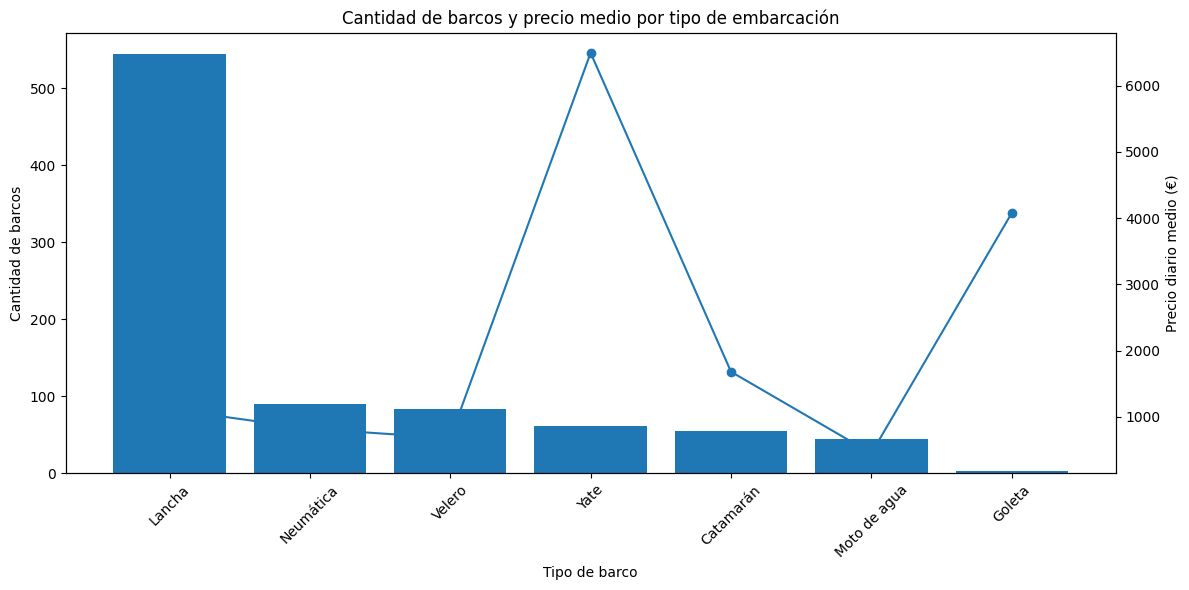

In [5]:
# Precio diario con ofertas de barcos (cantidad) tipo de barco

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por tipo de barco
resumen = (
    clickandboat
    .groupby("tipo_barco")
    .agg(
        cantidad_barcos=("tipo_barco", "count"),
        precio_medio=("precio_dia", "mean")   # <- CORREGIDO
    )
    .sort_values("cantidad_barcos", ascending=False)
)

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Barras: cantidad de barcos ---
ax1.bar(resumen.index, resumen["cantidad_barcos"])
ax1.set_xlabel("Tipo de barco")
ax1.set_ylabel("Cantidad de barcos")
ax1.tick_params(axis='x', rotation=45)

# --- Línea: precio medio ---
ax2 = ax1.twinx()
ax2.plot(resumen.index, resumen["precio_medio"], marker='o')
ax2.set_ylabel("Precio diario medio (€)")

plt.title("Cantidad de barcos y precio medio por tipo de embarcación")
plt.tight_layout()
plt.show()



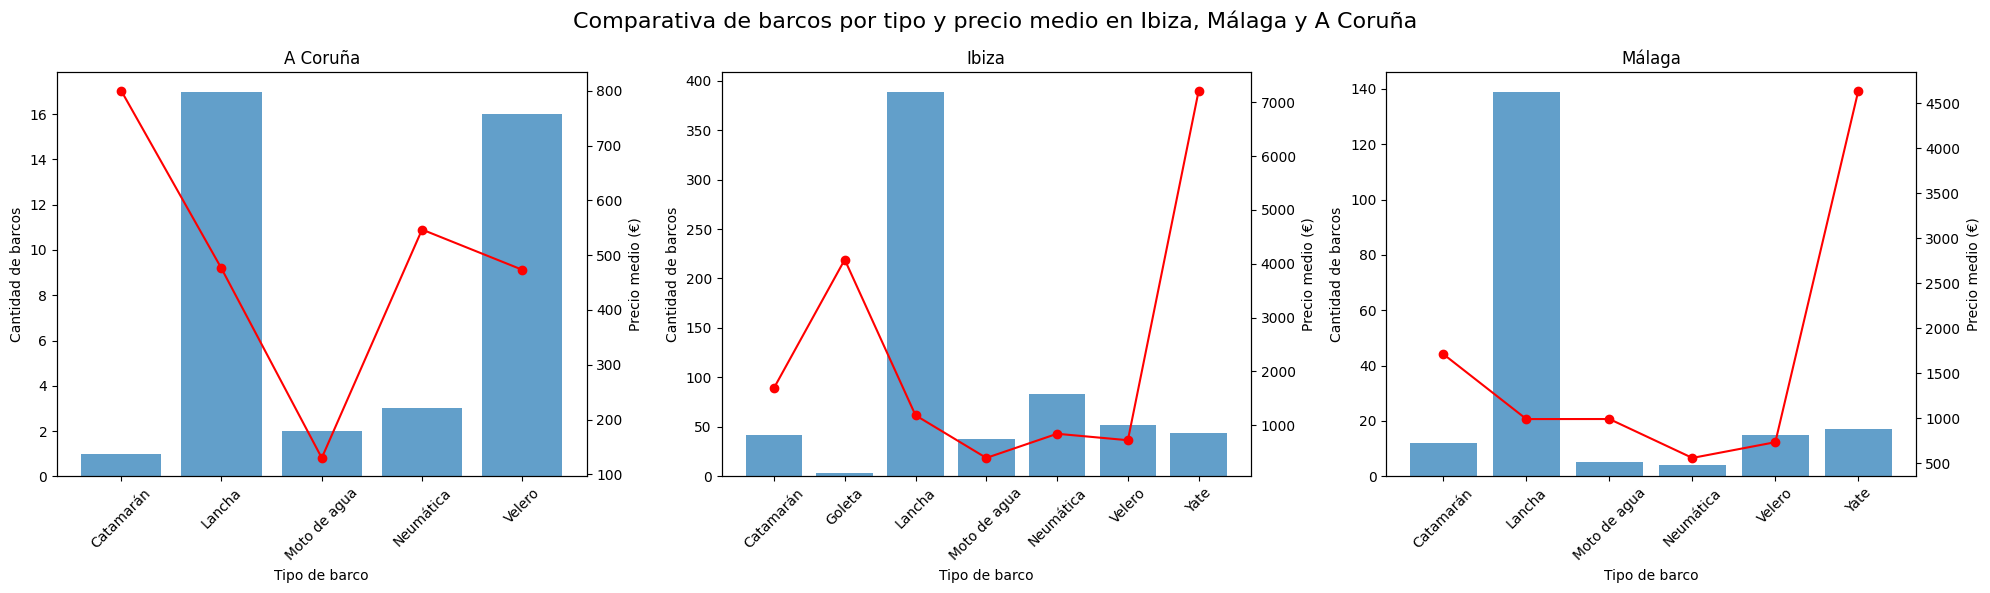

In [ ]:
# Precio medio en las ciudades por tipo de barcos

import pandas as pd
import matplotlib.pyplot as plt

# Agrupación por ciudad y tipo de barco
resumen = (
    clickandboat
    .groupby(["ZONA_PROYECTO", "tipo_barco"])
    .agg(
        cantidad_barcos=("tipo_barco", "count"),
        precio_medio=("precio_dia", "mean")
    )
    .reset_index()
)

# Ciudades en el proyecto
ciudades = resumen["ZONA_PROYECTO"].unique()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

for ax, ciudad in zip(axes, ciudades):
    data = resumen[resumen["ZONA_PROYECTO"] == ciudad]

    # Barras: cantidad de barcos
    ax.bar(data["tipo_barco"], data["cantidad_barcos"], alpha=0.7, label="Cantidad")

    # Línea: precio medio
    ax2 = ax.twinx()
    ax2.plot(data["tipo_barco"], data["precio_medio"], marker='o', color='red', label="Precio medio")

    ax.set_title(f"{ciudad}")
    ax.set_xlabel("Tipo de barco")
    ax.set_ylabel("Cantidad de barcos")
    ax.tick_params(axis='x', rotation=45)

    ax2.set_ylabel("Precio medio (€)")

plt.suptitle("Comparativa de barcos por tipo y precio medio en Ibiza, Málaga y A Coruña", fontsize=16)
plt.tight_layout()
plt.show()


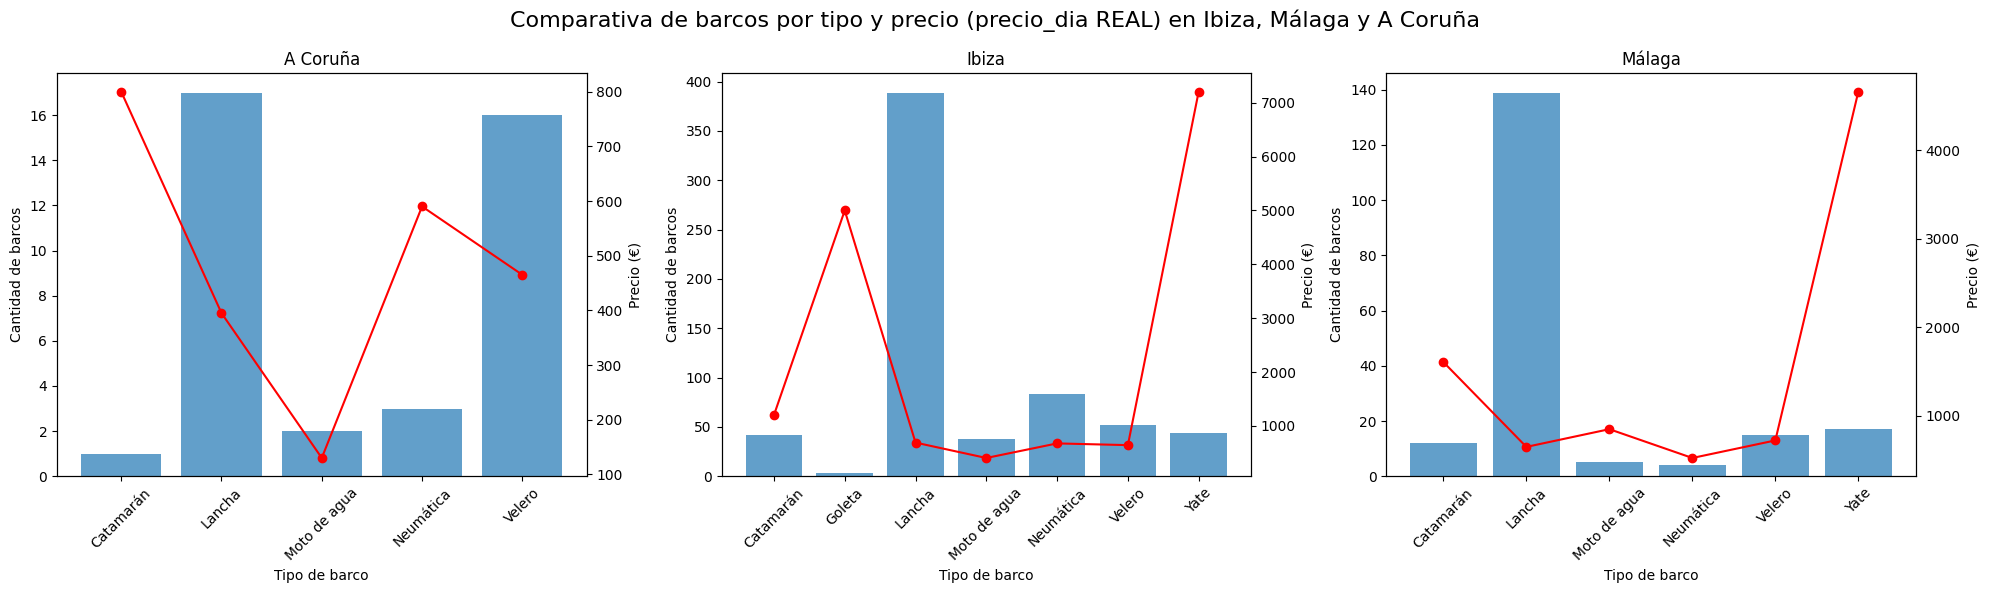

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupación por ciudad y tipo de barco
# precio_dia sin hacer "media": usamos mediana (valor representativo sin promediar)
resumen = (
    clickandboat
    .groupby(["ZONA_PROYECTO", "tipo_barco"])
    .agg(
        cantidad_barcos=("tipo_barco", "count"),
        precio_representativo=("precio_dia", "median")
    )
    .reset_index()
)

# Ciudades detectadas
ciudades = resumen["ZONA_PROYECTO"].unique()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

for ax, ciudad in zip(axes, ciudades):
    data = resumen[resumen["ZONA_PROYECTO"] == ciudad]

    # Barras: cantidad de barcos
    ax.bar(data["tipo_barco"], data["cantidad_barcos"], alpha=0.7, label="Cantidad")

    # Línea: precio (mediana)
    ax2 = ax.twinx()
    ax2.plot(
        data["tipo_barco"],
        data["precio_representativo"],
        marker='o',
        color='red',
        label="Precio"
    )

    ax.set_title(f"{ciudad}")
    ax.set_xlabel("Tipo de barco")
    ax.set_ylabel("Cantidad de barcos")
    ax.tick_params(axis='x', rotation=45)

    ax2.set_ylabel("Precio (€)")

plt.suptitle("Comparativa de barcos por tipo y precio (precio_dia REAL) en Ibiza, Málaga y A Coruña", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Cargamos la query que queremos mostras en graficos

query = """
SELECT
    b.ZONA_PROYECTO,
    ROUND(AVG(b.precio_dia), 2)           AS precio_medio_dia,
    ROUND(AVG(c.temperatura_med), 2)      AS temp_media_julio,
    ROUND(AVG(c.temperatura_max), 2)      AS temp_max_media_julio,
    ROUND(AVG(c.velocidad_med_viento), 2) AS viento_medio_julio
FROM clickandboat_barcos b
JOIN aemet_clima c
    ON b.ZONA_PROYECTO = c.ZONA_PROYECTO
GROUP BY b.ZONA_PROYECTO
ORDER BY precio_medio_dia DESC;
"""

df_query = pd.read_sql(query, engine)


In [ ]:
# Por si llega alguna columna como texto

for col in df_query.columns:
    if col != "ZONA_PROYECTO":
        df_query[col] = pd.to_numeric(df_query[col], errors="coerce")


<Figure size 1200x600 with 0 Axes>

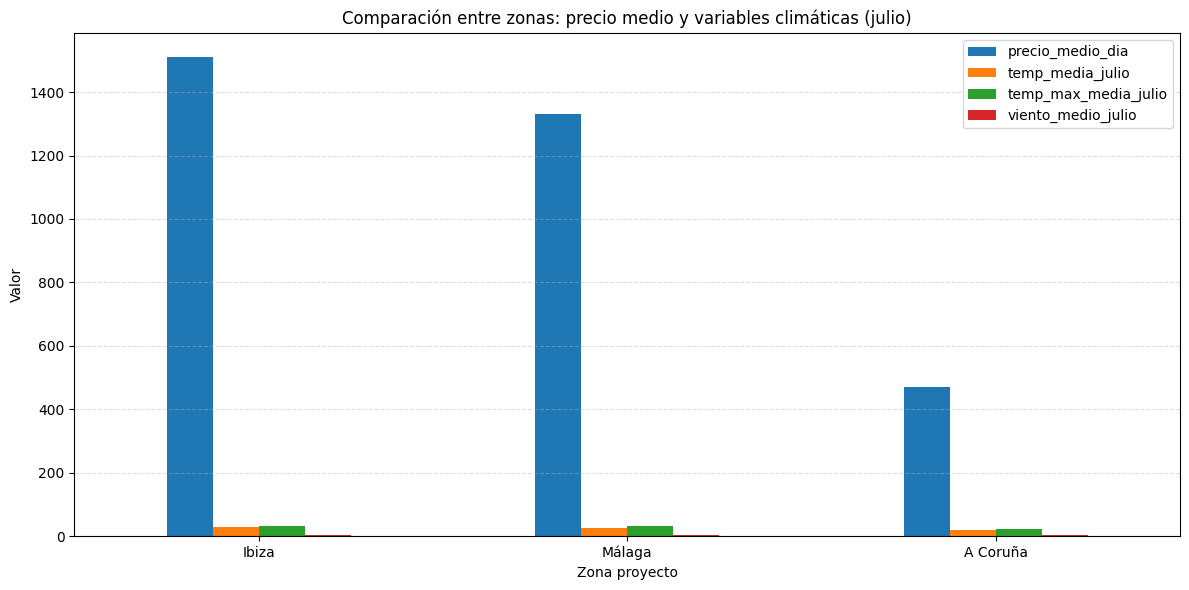

In [ ]:
# Precio medio de barcos vs temperatura y viento medio de julio

import matplotlib.pyplot as plt

variables = [
    'precio_medio_dia',
    'temp_media_julio',
    'temp_max_media_julio',
    'viento_medio_julio'
]

df_plot = df_query.set_index('ZONA_PROYECTO')[variables]

plt.figure(figsize=(12,6))
ax = df_plot.plot(kind='bar', figsize=(12,6))

ax.set_title("Comparación entre zonas: precio medio y variables climáticas (julio)")
ax.set_xlabel("Zona proyecto")
ax.set_ylabel("Valor")
ax.tick_params(axis='x', rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# Distribución de precios por zona (para ver si una zona es claramente más cara)

query = """
SELECT
    ZONA_PROYECTO,
    MIN(precio_dia)                 AS precio_min,
    ROUND(AVG(precio_dia), 2)       AS precio_medio,
    MAX(precio_dia)                 AS precio_max,
    COUNT(*)                        AS num_barcos
FROM clickandboat_barcos
GROUP BY ZONA_PROYECTO
ORDER BY precio_medio DESC;
"""

In [ ]:
df_plot = pd.read_sql(query, engine)

# -----------------------------
#  Crear columna para tamaño de burbuja
# -----------------------------
df_plot["rango_precio"] = df_plot["precio_max"] - df_plot["precio_min"]

# -----------------------------
#  Gráfico burbuja interactivo
# -----------------------------
fig = px.scatter(
    df_plot,
    x="precio_medio",
    y="num_barcos",
    size="rango_precio",
    color="precio_medio",
    hover_name="ZONA_PROYECTO",
    size_max=60,
    color_continuous_scale="Plasma",
    labels={
        "precio_medio": "Precio medio (€)",
        "num_barcos": "Número de barcos",
        "rango_precio": "Rango de precios (€)",
        "precio_min": "Precio mínimo",
        "precio_max": "Precio máximo"
    },
    title="Distribución de precios de barcos por zona (burbuja = rango de precios)"
)

fig.show()

In [85]:
query = """
SELECT
    b.ZONA_PROYECTO,
    ROUND(AVG(b.precio_dia), 2)          AS precio_medio_dia,
    tn.turistas_nacionales,
    ti.turistas_internacionales,
    (tn.turistas_nacionales 
     + ti.turistas_internacionales)      AS turistas_totales,
    COUNT(*) AS num_barcos
FROM clickandboat_barcos b
JOIN (
    SELECT 
        ZONA_PROYECTO,
        SUM(TURISTAS_AJUSTADOS) AS turistas_nacionales
    FROM turistas_nacional_julio
    GROUP BY ZONA_PROYECTO
) tn
    ON b.ZONA_PROYECTO = tn.ZONA_PROYECTO
JOIN (
    SELECT 
        ZONA_PROYECTO,
        SUM(TURISTAS_AJUSTADOS) AS turistas_internacionales
    FROM turistas_internacionales_julio
    GROUP BY ZONA_PROYECTO
) ti
    ON b.ZONA_PROYECTO = ti.ZONA_PROYECTO
GROUP BY 
    b.ZONA_PROYECTO,
    tn.turistas_nacionales,
    ti.turistas_internacionales
ORDER BY turistas_totales DESC;
"""

In [87]:
df_plot = pd.read_sql(query, engine)

# -----------------------------
#  Crear gráfico de burbujas
# -----------------------------
fig = px.scatter(
    df_plot,
    x="precio_medio_dia",
    y="turistas_totales",
    size="num_barcos",
    color="turistas_totales",
    hover_name="ZONA_PROYECTO",
    size_max=60,
    color_continuous_scale="Viridis",
    labels={
        "precio_medio_dia": "Precio medio por día (€)",
        "turistas_totales": "Turistas totales",
        "num_barcos": "Número de barcos"
    },
    title="Precio medio por día vs Turistas totales (tamaño = número de barcos)"
)

fig.show()

In [14]:
!pip install geopandas shapely

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/22.9 MB 13.4 MB/s eta 0:00:02
   -------- ------------------------------- 5.0/22.9 MB 13.1 MB/s eta 0:00:02
   ------------- -------------------------- 7.6/22.9 MB 12.4 MB/s eta 0:00:02
   ----------------- ---------------------- 10.2/22.9 MB 12.3 MB/s eta 0:00:02
   ----------------------- ---------------- 13.4/22.9 MB 12.7 MB/s eta 0:00:01
   ---------------------------- ----------- 16.3/22.9 MB 12.9 MB/s eta 0:00:01
   --------------------------------- ------ 19.1/22.9 MB 13.0 MB/s eta 0:00:01
   -------------------------------------- - 22.3/22.9 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 22.9/22.9 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


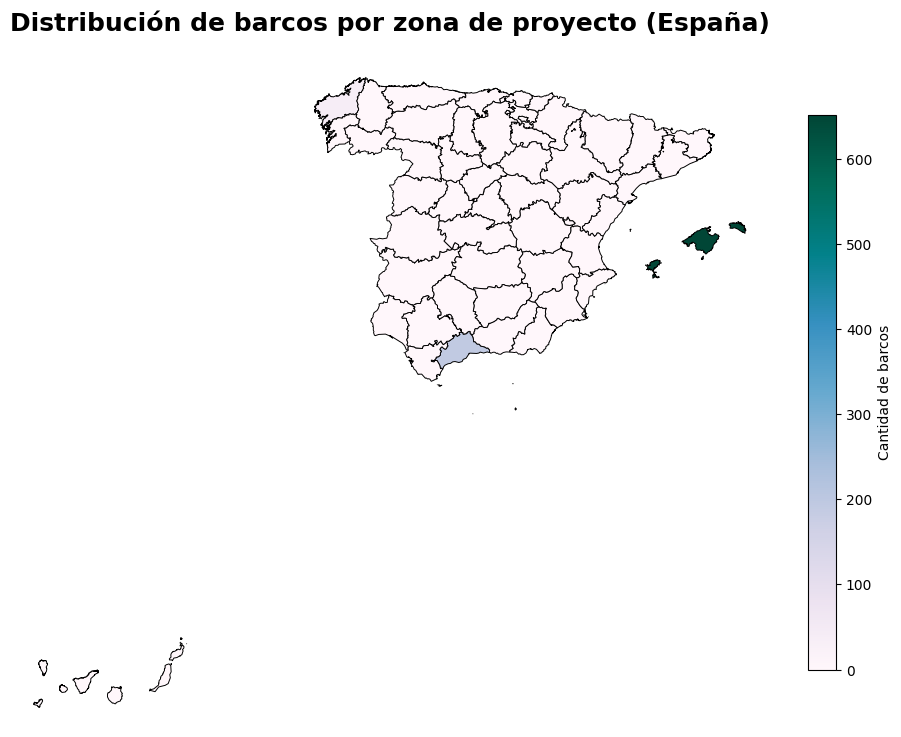

In [ ]:
# Barcos por provincias mapa de España

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Barcos por zona
# -----------------------------
df_counts = clickandboat.groupby("ZONA_PROYECTO").size().reset_index(name="cantidad_barcos")
df_counts["ZONA_PROYECTO"] = df_counts["ZONA_PROYECTO"].str.upper()

# Ajuste necesario para Baleares
df_counts["ZONA_PROYECTO"] = df_counts["ZONA_PROYECTO"].replace({
    "IBIZA": "ILLES BALEARS"
})

# -----------------------------
# 2) GeoJSON
# -----------------------------
provincias = gpd.read_file("spain-provinces.geojson")
provincias = provincias.to_crs(epsg=4326)
provincias["ZONA_PROYECTO"] = provincias["name"].str.upper()

# -----------------------------
# 3) Merge
# -----------------------------
map_data = provincias.merge(df_counts, on="ZONA_PROYECTO", how="left")
map_data["cantidad_barcos"] = map_data["cantidad_barcos"].fillna(0)

# -----------------------------
# 4) Dibujo mejorado
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 12))

map_data.plot(
    column="cantidad_barcos",
    cmap="PuBuGn",             # Mejor contraste que Blues
    linewidth=0.7,
    edgecolor="black",         # Contorno más visible
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Cantidad de barcos",
        "shrink": 0.6,
        "orientation": "vertical"
    }
)

# Quitar ejes
ax.set_axis_off()

# Título elegante
plt.title(
    "Distribución de barcos por zona de proyecto (España)",
    fontsize=18,
    fontweight="bold",
    pad=20
)

# Ajustar zoom automático a España
minx, miny, maxx, maxy = map_data.total_bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

plt.show()


In [36]:
provincias = gpd.read_file("spain-provinces.geojson")
provincias = provincias.to_crs(epsg=4326)   # <--- necesario


In [37]:
coords = {
    "IBIZA": {"lon": 1.44, "lat": 38.95},
    "MALAGA": {"lon": -4.42, "lat": 36.72},
    "A CORUÑA": {"lon": -8.41, "lat": 43.36},
}


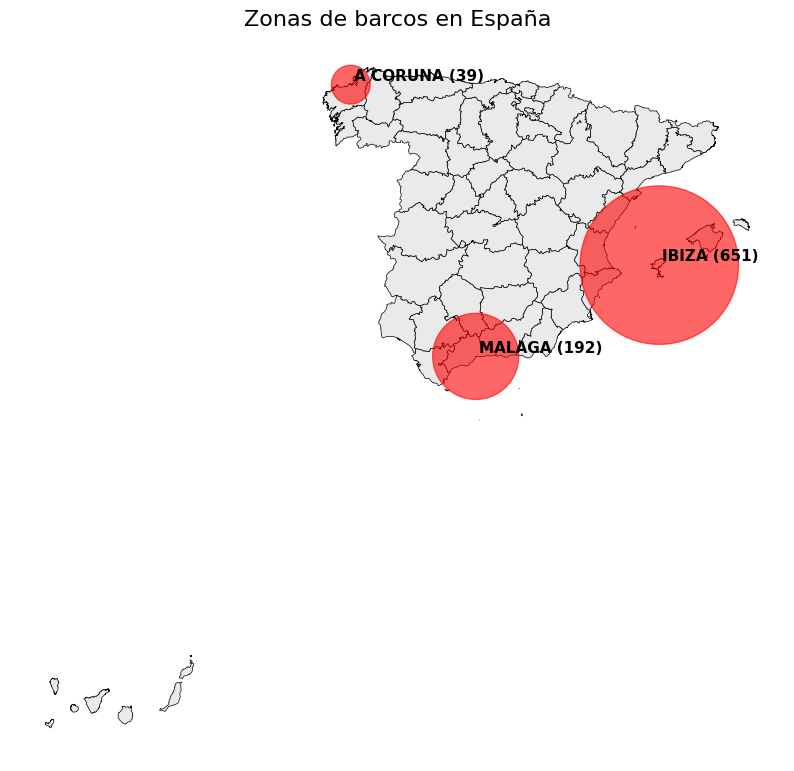

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import unicodedata

# -----------------------------
# Función para quitar tildes
# -----------------------------
def quitar_tildes(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', str(s))
        if unicodedata.category(c) != 'Mn'
    )

# -----------------------------
# 1) Normalizar nombres
# -----------------------------
clickandboat["ZONA_NORM"] = clickandboat["ZONA_PROYECTO"].apply(
    lambda x: quitar_tildes(x).upper()
)

# -----------------------------
# 2) Coordenadas aproximadas de cada zona
# -----------------------------
coords = {
    "A CORUNA": {"lon": -8.41, "lat": 43.36},
    "IBIZA":    {"lon": 1.44,  "lat": 38.95},
    "MALAGA":   {"lon": -4.42, "lat": 36.72},
}

# -----------------------------
# 3) Cargar mapa de España
# -----------------------------
provincias = gpd.read_file("spain-provinces.geojson")
espana = provincias.to_crs("EPSG:4326")

# -----------------------------
# 4) Crear GeoDataFrame con puntos y cantidad de barcos
# -----------------------------
puntos_lista = []
for zona in clickandboat["ZONA_NORM"].unique():
    if zona in coords:
        cantidad = clickandboat[clickandboat["ZONA_NORM"]==zona].shape[0]
        puntos_lista.append({
            "zona": zona,
            "cantidad": cantidad,
            "geometry": Point(coords[zona]["lon"], coords[zona]["lat"])
        })

puntos = gpd.GeoDataFrame(puntos_lista, crs="EPSG:4326")

# -----------------------------
# 5) Graficar mapa y círculos proporcionales
# -----------------------------
fig, ax = plt.subplots(figsize=(10,12))

# Mapa base en gris
espana.plot(ax=ax, color="#EAEAEA", edgecolor="black", linewidth=0.5)

# Círculos proporcionales
# Ajusta multiplicador 20 si quieres círculos más grandes o pequeños
puntos.plot(
    ax=ax,
    color="red",
    alpha=0.6,
    markersize=puntos["cantidad"] * 20
)

# Etiquetas con nombre y cantidad
for i, row in puntos.iterrows():
    plt.text(
        row.geometry.x + 0.1,
        row.geometry.y + 0.1,
        f"{row['zona']} ({row['cantidad']})",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Zonas de barcos en España", fontsize=16)
plt.axis("off")
plt.show()


In [ ]:
# Precio por plaza vs presión turística (para controlar por tamaño del barco)

query_main = """
SELECT
    b.ZONA_PROYECTO,
    ROUND(AVG(b.precio_dia / b.capacidad_personas), 2) AS precio_medio_por_plaza,
    (tn.turistas_nacionales 
     + ti.turistas_internacionales) AS turistas_totales
FROM clickandboat_barcos b
JOIN (
    SELECT 
        ZONA_PROYECTO,
        SUM(TURISTAS_AJUSTADOS) AS turistas_nacionales
    FROM turistas_nacional_julio
    GROUP BY ZONA_PROYECTO
) tn
    ON b.ZONA_PROYECTO = tn.ZONA_PROYECTO
JOIN (
    SELECT 
        ZONA_PROYECTO,
        SUM(TURISTAS_AJUSTADOS) AS turistas_internacionales
    FROM turistas_internacionales_julio
    GROUP BY ZONA_PROYECTO
) ti
    ON b.ZONA_PROYECTO = ti.ZONA_PROYECTO
GROUP BY 
    b.ZONA_PROYECTO,
    turistas_totales
ORDER BY precio_medio_por_plaza DESC;
"""

In [50]:
# Por si llega alguna columna como texto

for col in df_query.columns:
    if col != "ZONA_PROYECTO":
        df_query[col] = pd.to_numeric(df_query[col], errors="coerce")

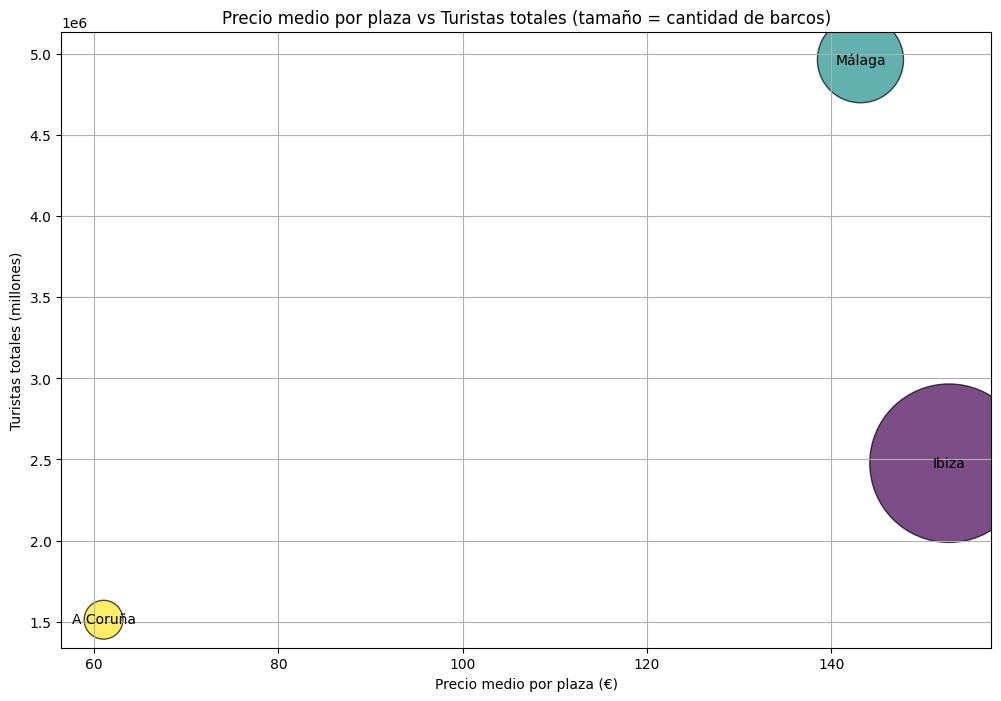

In [56]:
df_main = pd.read_sql(query_main, engine)

# -----------------------------
# 1) Contar cantidad de barcos por zona
# -----------------------------
df_counts = pd.read_sql("SELECT ZONA_PROYECTO, COUNT(*) AS cantidad_barcos FROM clickandboat_barcos GROUP BY ZONA_PROYECTO", engine)

# -----------------------------
# 2) Merge datos para burbujas
# -----------------------------
df_plot = df_main.merge(df_counts, on="ZONA_PROYECTO", how="left")

# -----------------------------
# 3) Gráfico de burbujas
# -----------------------------
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    df_plot['precio_medio_por_plaza'],
    df_plot['turistas_totales'],
    s=df_plot['cantidad_barcos']*20,  # tamaño proporcional a cantidad de barcos
    c=range(len(df_plot)),  # color distinto por zona
    cmap='viridis',
    alpha=0.7,
    edgecolors='black'
)

# Etiquetas de cada zona
for i, row in df_plot.iterrows():
    plt.text(row['precio_medio_por_plaza'], row['turistas_totales'], row['ZONA_PROYECTO'],
             fontsize=10, ha='center', va='center', color='black')

plt.xlabel("Precio medio por plaza (€)")
plt.ylabel("Turistas totales (millones)")
plt.title("Precio medio por plaza vs Turistas totales (tamaño = cantidad de barcos)")
plt.grid(True)
plt.show()

In [ ]:
# Clima (más fresco/ventoso) vs tipo de barco

query = """
SELECT
    bt.ZONA_PROYECTO,
    bt.total_barcos,
    bt.num_barcos_vela,
    bt.num_barcos_motor,
    ROUND(bt.num_barcos_vela  * 100.0 / bt.total_barcos, 1) AS pct_barcos_vela,
    ROUND(bt.num_barcos_motor * 100.0 / bt.total_barcos, 1) AS pct_barcos_motor,
    cv.temp_media_julio,
    cv.viento_medio_julio
FROM (
    SELECT
        ZONA_PROYECTO,
        COUNT(*) AS total_barcos,
        SUM(CASE 
                WHEN tipo_barco IN ('Velero','Catamarán','Goleta') 
                THEN 1 ELSE 0 
            END) AS num_barcos_vela,
        SUM(CASE 
                WHEN tipo_barco IN ('Lancha','Neumática','Yate','Moto de agua') 
                THEN 1 ELSE 0 
            END) AS num_barcos_motor
    FROM clickandboat_barcos
    GROUP BY ZONA_PROYECTO
) bt
JOIN (
    SELECT
        ZONA_PROYECTO,
        ROUND(AVG(temperatura_med), 2)      AS temp_media_julio,
        ROUND(AVG(velocidad_med_viento), 2) AS viento_medio_julio
    FROM aemet_clima
    GROUP BY ZONA_PROYECTO
) cv
    ON bt.ZONA_PROYECTO = cv.ZONA_PROYECTO
ORDER BY pct_barcos_vela DESC;
"""

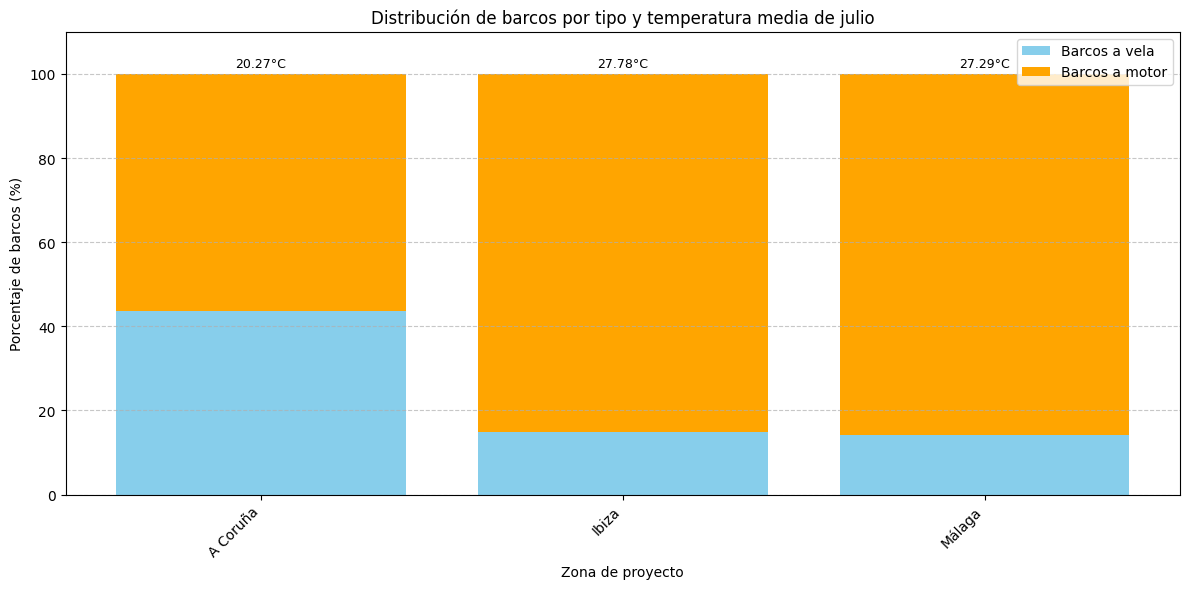

In [58]:
df_query = pd.read_sql(query, engine)

# -----------------------------
# 4) Gráfico de barras apiladas
# -----------------------------
zonas = df_query['ZONA_PROYECTO']
pct_vela = df_query['pct_barcos_vela']
pct_motor = df_query['pct_barcos_motor']
temp_media = df_query['temp_media_julio']

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(zonas, pct_vela, label='Barcos a vela', color='skyblue')
ax.bar(zonas, pct_motor, bottom=pct_vela, label='Barcos a motor', color='orange')

# Etiquetas de temperatura media encima de cada barra
for i, temp in enumerate(temp_media):
    ax.text(i, 100 + 1, f'{temp}°C', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Porcentaje de barcos (%)')
ax.set_xlabel('Zona de proyecto')
ax.set_title('Distribución de barcos por tipo y temperatura media de julio')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Comparar directamente Velero vs Lancha dentro de cada zona

query = """
SELECT
    ZONA_PROYECTO,
    tipo_barco,
    COUNT(*)                  AS num_barcos,
    ROUND(AVG(precio_dia),2)  AS precio_medio
FROM clickandboat_barcos
WHERE tipo_barco IN ('Velero','Lancha')
GROUP BY ZONA_PROYECTO, tipo_barco
ORDER BY ZONA_PROYECTO, tipo_barco;
"""

C:\Users\pccom\AppData\Local\Temp\ipykernel_32132\3086899752.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i - bar_width/2, df_plot['Velero'][i]+0.2, f"{df_precios['Velero'][i]:.0f}€",
C:\Users\pccom\AppData\Local\Temp\ipykernel_32132\3086899752.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width/2, df_plot['Lancha'][i]+0.2, f"{df_precios['Lancha'][i]:.0f}€",


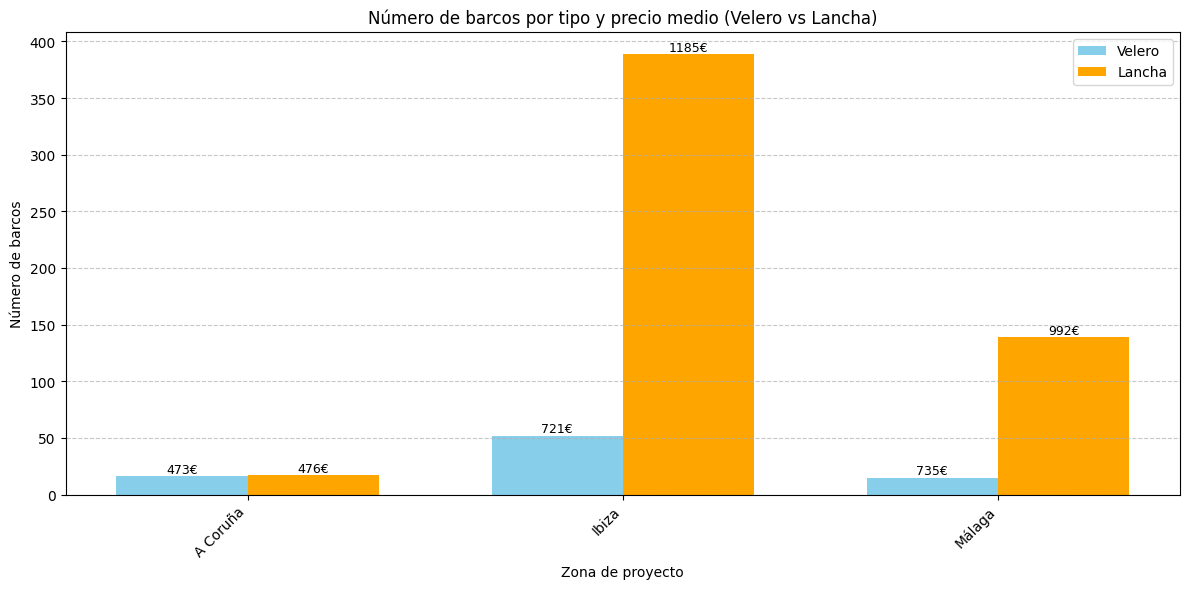

In [ ]:
df_query = pd.read_sql(query, engine)

# Pivot para que Velero y Lancha sean columnas separadas
df_plot = df_query.pivot(index='ZONA_PROYECTO', columns='tipo_barco', values='num_barcos').fillna(0)

# También pivot para precios
df_precios = df_query.pivot(index='ZONA_PROYECTO', columns='tipo_barco', values='precio_medio')

# -----------------------------
#  Gráfico de barras agrupadas
# -----------------------------
zonas = df_plot.index
bar_width = 0.35
x = range(len(zonas))

fig, ax = plt.subplots(figsize=(12,6))

# Barras para Velero
ax.bar([i - bar_width/2 for i in x], df_plot['Velero'], width=bar_width, label='Velero', color='skyblue')
# Barras para Lancha
ax.bar([i + bar_width/2 for i in x], df_plot['Lancha'], width=bar_width, label='Lancha', color='orange')

# Añadir precio medio encima de cada barra
for i in x:
    if 'Velero' in df_precios.columns:
        ax.text(i - bar_width/2, df_plot['Velero'][i]+0.2, f"{df_precios['Velero'][i]:.0f}€", 
                ha='center', va='bottom', fontsize=9)
    if 'Lancha' in df_precios.columns:
        ax.text(i + bar_width/2, df_plot['Lancha'][i]+0.2, f"{df_precios['Lancha'][i]:.0f}€", 
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel("Zona de proyecto")
ax.set_ylabel("Número de barcos")
ax.set_title("Número de barcos por tipo y precio medio (Velero vs Lancha)")
ax.set_xticks(x)
ax.set_xticklabels(zonas, rotation=45, ha='right')
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Mix de producto completo por zona (todos los tipos de barco)

query = """
SELECT
    ZONA_PROYECTO,
    tipo_barco,
    COUNT(*) AS num_barcos,
    ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY ZONA_PROYECTO), 1) AS pct_sobre_zona
FROM clickandboat_barcos
GROUP BY ZONA_PROYECTO, tipo_barco
ORDER BY ZONA_PROYECTO, pct_sobre_zona DESC;
"""

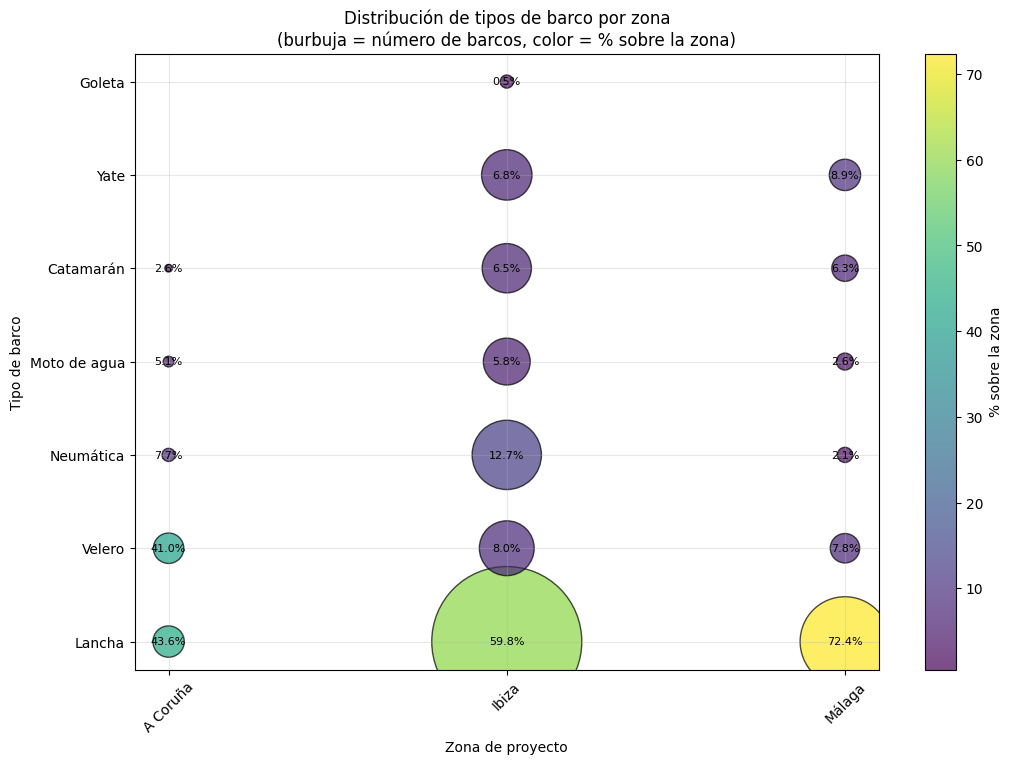

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

plt.figure(figsize=(12,8))
ax = plt.gca()   # 👉 aseguramos un eje asociado

sizes = df_query['num_barcos'] * 30

# Normalización y mapa de color
norm = plt.Normalize(df_query['pct_sobre_zona'].min(),
                     df_query['pct_sobre_zona'].max())
cmap = plt.cm.viridis

# Dibujar burbujas
scatter = ax.scatter(
    df_query['ZONA_PROYECTO'],
    df_query['tipo_barco'],
    s=sizes,
    c=df_query['pct_sobre_zona'],
    cmap=cmap,
    norm=norm,
    alpha=0.7,
    edgecolors='black'
)

# Etiquetas dentro de las burbujas
for _, row in df_query.iterrows():
    ax.text(
        row['ZONA_PROYECTO'], 
        row['tipo_barco'], 
        f"{row['pct_sobre_zona']}%", 
        fontsize=8, ha='center', va='center'
    )

ax.set_xlabel("Zona de proyecto")
ax.set_ylabel("Tipo de barco")
ax.set_title("Distribución de tipos de barco por zona\n(burbuja = número de barcos, color = % sobre la zona)")
plt.xticks(rotation=45)

# 👉 Colorbar CORRECTAMENTE ASOCIADO AL AX
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("% sobre la zona")

plt.grid(True, alpha=0.3)
plt.show()


In [66]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Segmentación de precios: ¿cuánto “mercado premium” tiene cada zona?

query = """
SELECT
    ZONA_PROYECTO,
    CASE
        WHEN precio_dia < 200 THEN 'Budget (<200€)'
        WHEN precio_dia BETWEEN 200 AND 500 THEN 'Mid (200–500€)'
        ELSE 'Premium (>500€)'
    END AS rango_precio,
    COUNT(*) AS num_barcos
FROM clickandboat_barcos
GROUP BY ZONA_PROYECTO, rango_precio
ORDER BY ZONA_PROYECTO, rango_precio;
"""

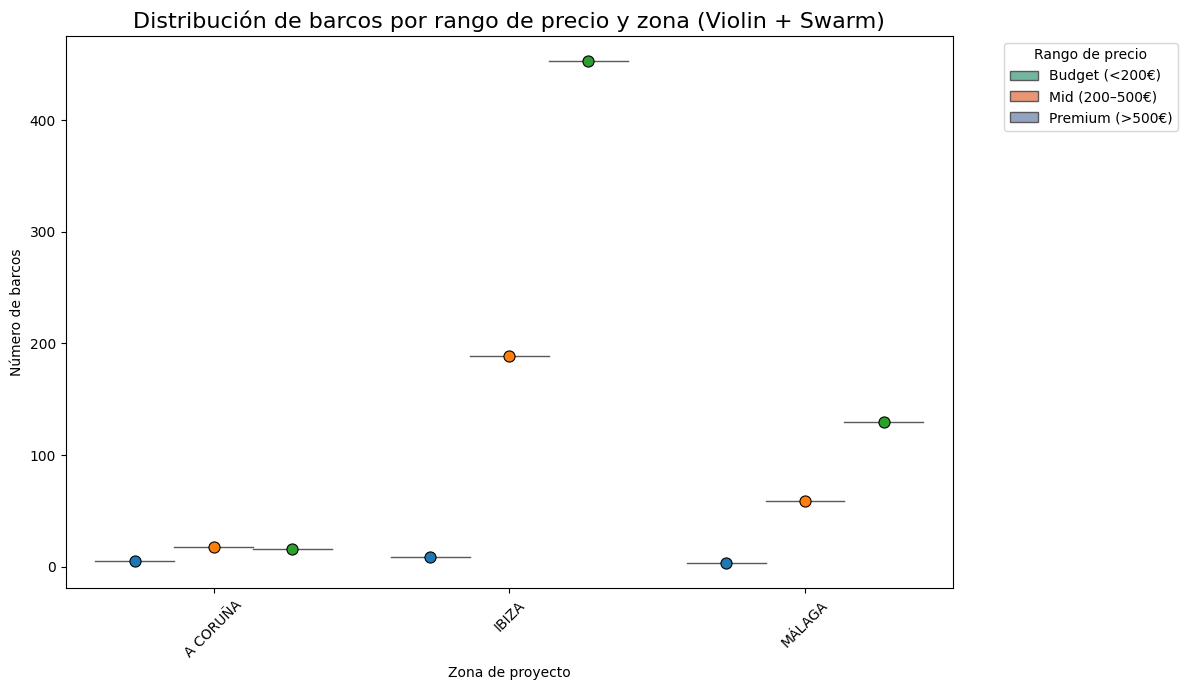

In [ ]:
df = pd.read_sql(query, engine)   # <-- usa tu engine

df["ZONA_PROYECTO"] = df["ZONA_PROYECTO"].str.upper()

# ---------------------------------------------------------
#  Gráfico VIOLIN + SWARM (puntos)
# ---------------------------------------------------------

plt.figure(figsize=(12,7))

# VIOLIN → muestra la distribución de número de barcos por rango de precio
sns.violinplot(
    data=df,
    x="ZONA_PROYECTO",
    y="num_barcos",
    hue="rango_precio",
    split=True,
    inner=None,
    linewidth=1,
    palette="Set2"
)

# PUNTOS → cada tipo de rango marcado individualmente
sns.swarmplot(
    data=df,
    x="ZONA_PROYECTO",
    y="num_barcos",
    hue="rango_precio",
    dodge=True,
    size=8,
    edgecolor="black",
    linewidth=0.8
)

plt.title("Distribución de barcos por rango de precio y zona (Violin + Swarm)", fontsize=16)
plt.xlabel("Zona de proyecto")
plt.ylabel("Número de barcos")
plt.xticks(rotation=45)

# Evitar 2 leyendas duplicadas
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Rango de precio",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [70]:
!pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_sql(query, engine)

df["ZONA_PROYECTO"] = df["ZONA_PROYECTO"].str.upper()

# ---------------------------------------------------------
#  Gráfico interactivo Plotly
# ---------------------------------------------------------
fig = px.scatter(
    df,
    x="ZONA_PROYECTO",
    y="num_barcos",
    color="rango_precio",
    size="num_barcos",
    hover_data=["ZONA_PROYECTO", "rango_precio", "num_barcos"],
    title="Distribución interactiva de barcos por rango de precio y zona",
    labels={
        "ZONA_PROYECTO": "Zona de proyecto",
        "num_barcos": "Número de barcos",
        "rango_precio": "Rango de precio"
    }
)

fig.update_traces(marker=dict(line=dict(width=1, color="black")))

fig.update_layout(
    xaxis=dict(tickangle=45),
    legend_title="Rango de precio",
    height=600
)

fig.show()

In [ ]:
# ¿En qué zona hay barcos más grandes? (capacidad media y eslora media)

query = """
SELECT
    ZONA_PROYECTO,
    ROUND(AVG(capacidad_personas), 1) AS capacidad_media,
    ROUND(AVG(eslora_m), 1)          AS eslora_media,
    ROUND(AVG(precio_dia), 2)        AS precio_medio,
    COUNT(*)                         AS num_barcos
FROM clickandboat_barcos
GROUP BY ZONA_PROYECTO
ORDER BY capacidad_media DESC;
"""


In [81]:
import plotly.express as px

fig = px.treemap(
    df_plot,
    path=["ZONA_PROYECTO"],
    values="num_barcos",
    color="precio_medio",
    color_continuous_scale="Blues",
    title="Número de barcos por zona (color = precio medio)"
)
fig.show()


In [ ]:
df_plot = pd.read_sql(query, engine)

# -----------------------------
#  Gráfico burbuja interactivo
# -----------------------------
fig = px.scatter(
    df_plot,
    x="capacidad_media",
    y="precio_medio",
    size="num_barcos",
    color="eslora_media",
    hover_name="ZONA_PROYECTO",
    size_max=60,
    color_continuous_scale="Viridis",
    labels={
        "capacidad_media": "Capacidad media (personas)",
        "precio_medio": "Precio medio (€)",
        "num_barcos": "Número de barcos",
        "eslora_media": "Eslora media (m)"
    },
    title="Precio medio vs Capacidad media por zona (burbuja = número de barcos)"
)

fig.show()